In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl;
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import identify_highly_correlated_features, one_hot, identify_low_variance_features, identify_missing_data, feature_importance_plot
from src.learning_curve_plot import learning_curve_plot


C:\Users\anaga\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
songs_data = pd.read_pickle("../data/songs_data_final.pkl")

In [3]:
target = songs_data["genre"]
features = songs_data.drop(["genre"], axis = 1)

In [4]:
X_train, X_test, y_train_xgb, y_test_xgb = train_test_split(features, target, test_size = 0.2, random_state = 8888)

In [5]:
xgb = XGBRegressor()

In [6]:
xgb.fit(X_train, y_train_xgb)

C:\Users\anaga\miniconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [7]:
y_pred_xgb = xgb.predict(X_test)

In [8]:
print("first five predicted values:", y_pred_xgb[0:5])
print("first five actual values:", list(y_test_xgb[0:5]))

first five predicted values: [3.052215  4.8885074 4.023358  2.0429304 2.9022818]
first five actual values: [3, 5, 1, 3, 3]


In [9]:
# the evaluation metrics for the model on the training set

y_pred_train_xgb = xgb.predict(X_train)

r2 = r2_score(y_train_xgb, y_pred_train_xgb)
print("R2:", round(r2, 2))
explained_var = explained_variance_score(y_train_xgb, y_pred_train_xgb)
print("Explained Variance:", round(explained_var, 2))
mae = mean_absolute_error(y_train_xgb, y_pred_train_xgb)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train_xgb, y_pred_train_xgb)
print("Mean Squared Error:", round(mse))

# seeing low error rates on the training set, in this case no error rate - signs of overfitting

R2: 0.69
Explained Variance: 0.69
Mean Absolute Error: 1
Mean Squared Error: 1


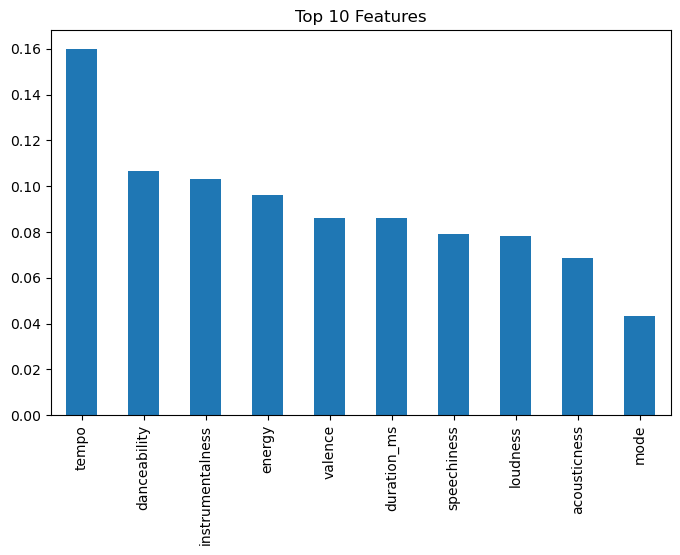

In [10]:
feature_importance_plot(xgb, X_train,10)

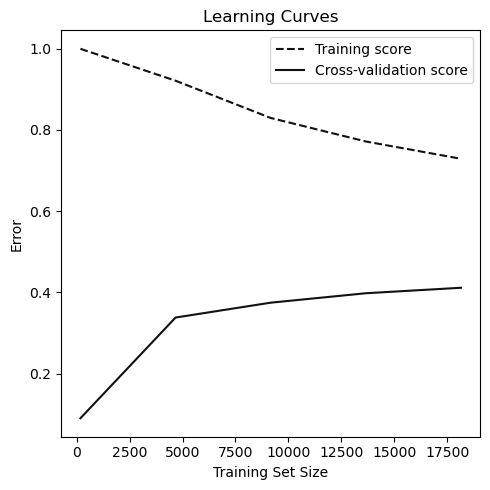

In [11]:
learning_curve_plot(xgb, X_train, y_train_xgb, scoring = 'r2')

In [12]:
XGBRegressor(n_estimators=500)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [13]:
# Let’s say we want to span the n_estimators hyperparameter from 100 to 500 with a step of 100 and the max_features hyperparameter from 0.1 to 1.0 with a step of 0.05. We are looking for the combination of these ranges that maximizes the average value of R2 in 5-fold cross-validation

params = {'n_estimators':np.arange(100,500,100),
          'max_features':np.arange(0.1,1.0,0.2)}

In [14]:
from sklearn.model_selection import GridSearchCV

# Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
# It is an exhaustive search that is performed on a the specific parameter values of a model. 
# The model is also known as an estimator. Grid search exercise can save us time, effort and resources.

grid_search = GridSearchCV(xgb,
                           params,
                           cv=5, 
                           scoring="r2",
                           verbose=1,
                           n_jobs=-1
                           )
grid_search.fit(X_train,y_train_xgb)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\anaga\miniconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:52:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=12,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'max_features': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'n_estimators': array([100, 200, 300, 400])},
             scoring='r2', verbose=1)

In [15]:
grid_search.best_params_

{'max_features': 0.1, 'n_estimators': 100}

In [16]:
grid_search.best_score_

0.4101746254042178

In [18]:
# pass in the best parameters

xgb_tuned = XGBRegressor(**grid_search.best_params_)
xgb_tuned.fit(X_train, y_train_xgb)

[18:53:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, max_features=0.1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [25]:
# the evaluation metrics for the model on the training set

y_pred_train_xgb = xgb_tuned.predict(X_train)

r2 = r2_score(y_train_xgb, y_pred_train_xgb)
print("R2:", round(r2, 2))
explained_var = explained_variance_score(y_train_xgb, y_pred_train_xgb)
print("Explained Variance:", round(explained_var, 2))
mae = mean_absolute_error(y_train_xgb, y_pred_train_xgb)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train_xgb, y_pred_train_xgb)
print("Mean Squared Error:", round(mse))

R2: 0.69
Explained Variance: 0.69
Mean Absolute Error: 1
Mean Squared Error: 1


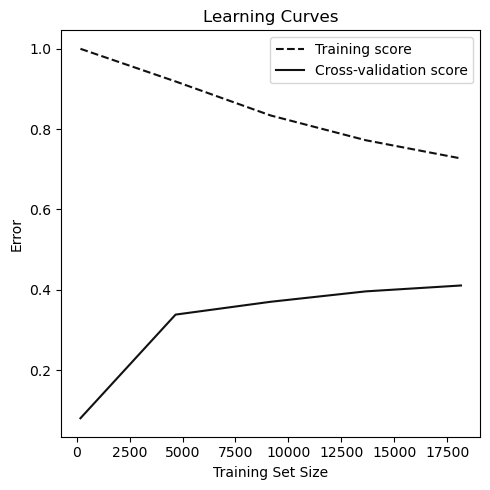

In [21]:
learning_curve_plot(xgb_tuned, X_train, y_train_xgb, scoring = 'r2')

# model still overfitting need to do some tuning